<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/9_2_Plotting_with_pandas_and_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

也就是说，再import seaborn之后，matplotlib的色彩和blabla之类的都会改变，变得更加好看

In [1]:
# 另外一个很有用的可视化library是seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Line Plots

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.826229
10   -1.732535
20   -1.789438
30   -1.541461
40   -2.710067
50   -2.411998
60   -1.580294
70   -0.895327
80   -1.673117
90   -1.900427
dtype: float64

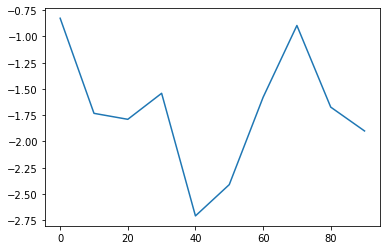

In [3]:
s.plot()